<a href="https://colab.research.google.com/github/deekshithathouda/Crop-Recommendation-System/blob/main/crop_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Preprocessing & Evaluation
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Save models
import joblib


**Load Dataset**

In [16]:
df = pd.read_csv("Crop_recommendation.csv")
print("Dataset loaded successfully!")
print(df.head())

Dataset loaded successfully!
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


**Add Soil Type Input Feature**

In [17]:
def assign_soil_type(row):
    if row['ph'] < 5.5:
        return 'Peaty'
    elif row['ph'] > 7.5:
        return 'Chalky'
    elif row['N'] > 100 and row['K'] > 100:
        return 'Loamy'
    elif row['rainfall'] > 200:
        return 'Clay'
    else:
        return 'Sandy'

df['soil_type'] = df.apply(assign_soil_type, axis=1)


**Encode Soil Type**

In [18]:
# Convert soil_type into numeric
le = LabelEncoder()
df['soil_type_encoded'] = le.fit_transform(df['soil_type'])

**Define Features and Labels**

In [19]:
# Drop non-numeric column
X = df.drop(['label', 'soil_type'], axis=1)
y = df['label']


**Scale Features**

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')  # Save scaler for Streamlit

['scaler.pkl']

**Split Dataset**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**Train and Evaluate Models**

🔹Logistic Regression🔹

Accuracy: 0.9613636363636363

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.89      0.85      0.87        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.85      0.96      0.90        23
 kidneybeans       0.90      0.95      0.93        20
      lentil       0.79      1.00      0.88        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.95      0.88      0.91        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00     

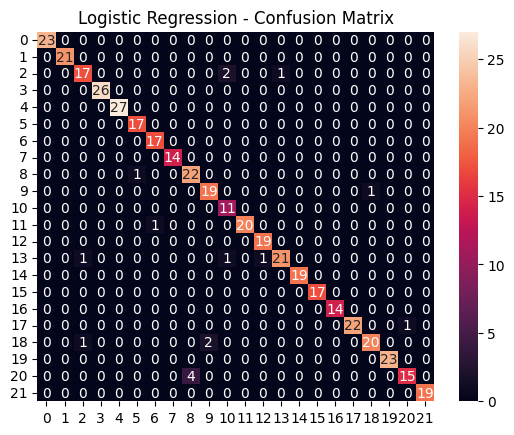

In [22]:
#Logistic Regression

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("🔹Logistic Regression🔹")
print()
print("Accuracy:", lr_acc)
print()
print(classification_report(y_test, lr_pred))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


🔹Decision Tree🔹

Accuracy: 0.9886363636363636

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       0.93      1.00 

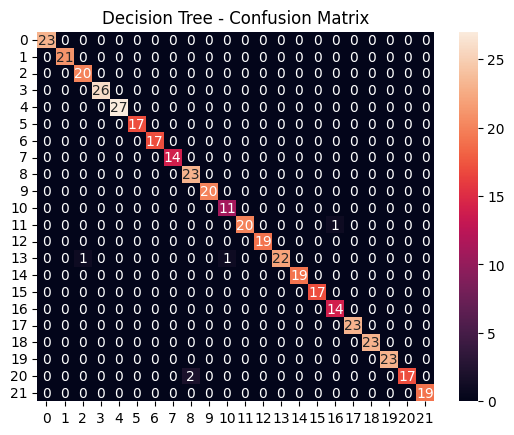

In [23]:
#Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("🔹Decision Tree🔹")
print()
print("Accuracy:", dt_acc)
print()
print(classification_report(y_test, dt_pred))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='d')
plt.title("Decision Tree - Confusion Matrix")
plt.show()


🔹Random Forest🔹

Accuracy: 0.9931818181818182

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

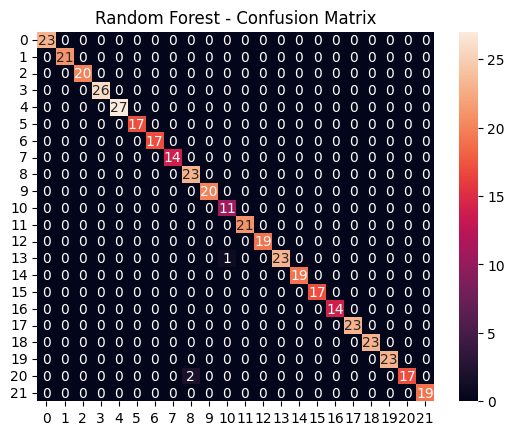

['crop_recommendation_model.pkl']

In [24]:
#Random Forest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("🔹Random Forest🔹")
print()
print("Accuracy:", rf_acc)
print()
print(classification_report(y_test, rf_pred))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d')
plt.title("Random Forest - Confusion Matrix")
plt.show()

# Save best model
joblib.dump(rf, 'crop_recommendation_model.pkl')


🔹Support Vector Machine🔹

Accuracy: 0.9681818181818181

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.85      0.96      0.90        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00  

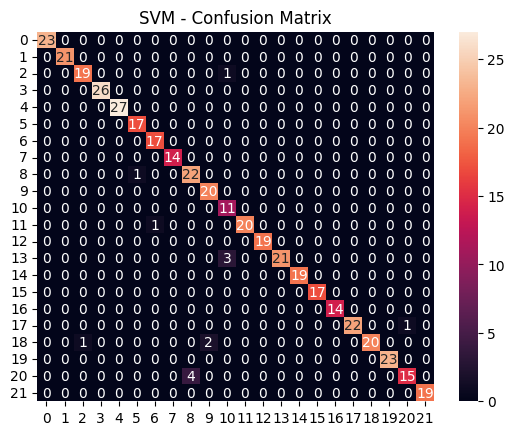

In [25]:
#SVM

svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("🔹Support Vector Machine🔹")
print()
print("Accuracy:", svm_acc)
print()
print(classification_report(y_test, svm_pred))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d')
plt.title("SVM - Confusion Matrix")
plt.show()


🔹K-Nearest Neighbours🔹

Accuracy: 0.9568181818181818

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.89      1.00      0.94        17
      grapes       1.00      1.00      1.00        14
        jute       0.85      0.96      0.90        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.69      1.00      0.81        11
       maize       1.00      0.90      0.95        21
       mango       0.86      1.00      0.93        19
   mothbeans       1.00      0.79      0.88        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00    

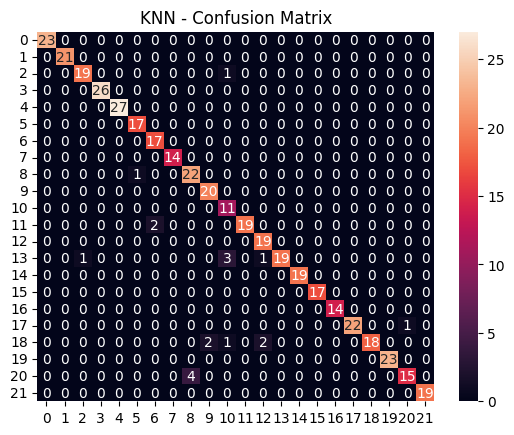

In [26]:
#KNN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("🔹K-Nearest Neighbours🔹")
print()
print("Accuracy:", knn_acc)
print()
print(classification_report(y_test, knn_pred))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d')
plt.title("KNN - Confusion Matrix")
plt.show()


🔹Naive Bayes🔹

Accuracy: 0.9681818181818181

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      0.65      0.79        17
      grapes       1.00      1.00      1.00        14
        jute       0.82      1.00      0.90        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       0.70      1.00      0.82        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00   

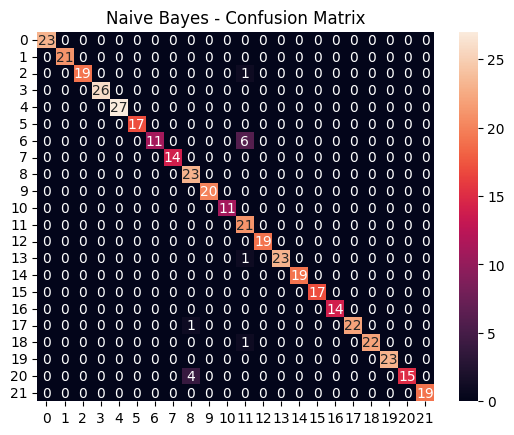

In [27]:
#Naive Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("🔹Naive Bayes🔹")
print()
print("Accuracy:", nb_acc)
print()
print(classification_report(y_test, nb_pred))
sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, fmt='d')
plt.title("Naive Bayes - Confusion Matrix")
plt.show()


**Comparing Accuracies of the Models**

                 Model  Accuracy
0  Logistic Regression  0.961364
1        Decision Tree  0.988636
2        Random Forest  0.993182
3                  SVM  0.968182
4                  KNN  0.956818
5          Naive Bayes  0.968182


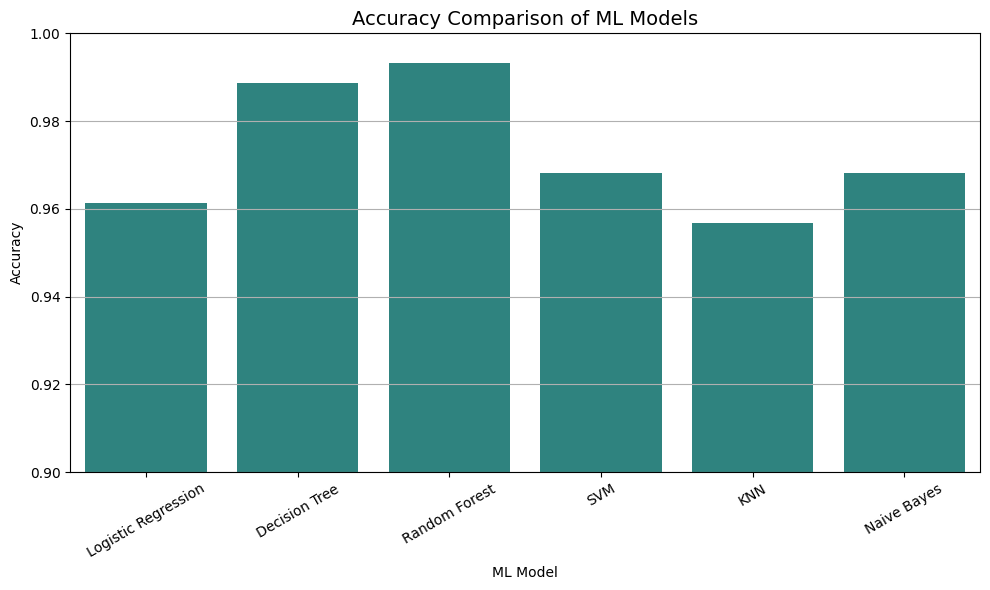

In [28]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes']
accuracies = [lr_acc, dt_acc, rf_acc, svm_acc, knn_acc, nb_acc]

result_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
print(result_df)


result_df['hue'] = 'All Models'  # dummy hue

plt.figure(figsize=(10,6))
sns.barplot(data=result_df, x='Model', y='Accuracy', hue='hue', palette='viridis')
plt.title("Accuracy Comparison of ML Models", fontsize=14)
plt.ylim(0.90, 1.0)
plt.xlabel("ML Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.legend([],[], frameon=False)
plt.show()
